<div style="border:solid green 2px; padding: 20px">
<b>Алексей, привет!</b>

Меня зовут Евгений Д., и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Содержание
* [Подготовка данных](#prepare_data)
  * [Изучение данных из файлов](#prepare_data.open_file)
  * [Проверка правильности вычисленной эффективности обогащения](#prepare_data.check_efficiency)
  * [Анализ признаков, недоступных в тестовой выборке](#prepare_data.analyse_test)
  * [Предобработка данных](#prepare_data.data_preprocessing)
* [Анализ данных](#analyse_data)
  * [Анализ изменения концентрация металлов (Au, Ag, Pb) на различных этапах очистки](#analyse_data.analyse_concentration)
  * [Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках](#analyse_data.compare_training_and_test)
  * [Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах](#analyse_data.analyse_sum_concentration)
* [Построение модели](#model_creation)
  * [Функция для вычисления итоговой sMAPE](#model_creation.create_function)
  * [Обучение моделей и оценка их качества кросс-валидацией](#model_creation.train_models)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться с тем о чем сам проект. Можно также привести описание используемых столбцов. 

</div>

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler

from collections import namedtuple

pd.set_option('display.max_columns', None)

RANDOM_STATE = 12345

TARGETS = ['rougher.output.recovery', 'final.output.recovery']

METALS = ['au', 'ag', 'pb']

CONCENTRATE_METRICS = [
    'rougher.input.feed',
    'rougher.output.concentrate',
    'primary_cleaner.output.concentrate',
    'final.output.concentrate',
]

In [2]:
def analyze_df(df):
    rows_count, columns_count = df.shape
    print('Количество стобцов:', columns_count)
    print('Количество строк:', rows_count)
    display(df.head(5))
    display(df.describe())
    df.info()
    
def print_df(df):
    with pd.option_context('display.max_rows', None):
        display(df)
        

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличные функции для проверки наших данных 👍

</div>

<a name="prepare_data"></a>
## Подготовка данных

<a name="prepare_data.open_file"></a>
### Изучение данных из файлов

Откроем датасеты с данными и проанализируем их

In [3]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date')

In [4]:
analyze_df(gold_recovery_train)

Количество стобцов: 86
Количество строк: 16860


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_cleaner.i

In [5]:
analyze_df(gold_recovery_test)

Количество стобцов: 52
Количество строк: 5856


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                         584

In [6]:
analyze_df(gold_recovery_full)

Количество стобцов: 86
Количество строк: 22716


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,21170.000000,22716.000000,21565.000000,22618.000000,22268.000000,21918.000000,22618.000000,22614.000000,22594.000000,22365.000000,22617.000000,22660.000000,22667.000000,22660.000000,22673.000000,22662.000000,22673.000000,22661.000000,22673.000000,2.267200e+04,2.267200e+04,2.267200e+04,21089.000000,22618.000000,22472.000000,22163.000000,22277.000000,22357.000000,22617.000000,21415.000000,22247.000000,22038.000000,20459.000000,22618.000000,22618.000000,22526.000000,22618.000000,19597.000000,19979.000000,22618.000000,19980.000000,19980.000000,22646.000000,22647.000000,22646.000000,22647.000000,22646.000000,22654.000000,22641.000000,22649.000000,22096.000000,22649.000000,22641.000000,22642.000000,22616.000000,22600.000000,20501.000000,22618.000000,22333.000000,22591.000000,22538.000000,22588.000000,22585.000000,22587.000000,22592.000000,22590.000000,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_cleaner.i

**Выводы**:
* В данных есть пропуски
* В тестовой выборке отсутствуют некоторые признаки, которые есть в обучающей выборке

<a name="prepare_data.check_efficiency"></a>
### Проверка правильности вычисленной эффективности обогащения

Напишем функцию для расчета Recovery по формуле  
$$\frac{C\cdot(F - T)}{F\cdot(C - T)}\cdot 100\%$$
где: 
* C — доля золота в концентрате после флотации/очистки (rougher.output.concentrate_au)
* F — доля золота в сырье/концентрате до флотации/очистки (rougher.input.feed_au)
* T — доля золота в отвальных хвостах после флотации/очистки (rougher.output.tail_au)

In [7]:
def calculate_recovery(rougher_output, rougher_input, rougher_tail):
    recovery = (rougher_output * (rougher_input - rougher_tail)) /\
        (rougher_input * (rougher_output - rougher_tail)) * 100
    
    recovery[recovery < 0] = np.nan
    recovery[recovery > 100] = np.nan
    return recovery

Посчитаем `recovery` на обучающей выборке

In [8]:
recovery = calculate_recovery(
    gold_recovery_train['rougher.output.concentrate_au'], 
    gold_recovery_train['rougher.input.feed_au'], 
    gold_recovery_train['rougher.output.tail_au'],
)
print(recovery.describe())

count    14287.000000
mean        82.394201
std         15.096808
min         -0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
dtype: float64


Вычилслим MAE между нашими расчётами и значением признака `rougher.output.recovery`

In [9]:
mae_recovery = mean_absolute_error(gold_recovery_train['rougher.output.recovery'].dropna(), recovery.dropna())
print('MAE =', mae_recovery)

MAE = 9.444891926100695e-15


**Вывод**: MAE (средняя абсолютная ошибка) между рассчитаной по формуле эффективностью обогащения и признаком из датасета очень мала, а значит значение эффективности в датасете верное.

<a name="prepare_data.analyse_test"></a>
### Анализ признаков, недоступных в тестовой выборке

Напишем функцию, которая вернет те столбцы, которые есть в одном датасете, но нет в другом

In [10]:
def fields_diff(first_df, second_df):
    return set(first_df.columns.to_list()) - set(second_df.columns.to_list())

Посмотрим, какие признаки есть в обучающей выборке. но нет в тестовой

In [11]:
missing_test_fields = fields_diff(gold_recovery_train, gold_recovery_test)
print(gold_recovery_train[missing_test_fields].dtypes)

secondary_cleaner.output.tail_sol                     float64
primary_cleaner.output.concentrate_sol                float64
rougher.output.recovery                               float64
final.output.recovery                                 float64
final.output.tail_sol                                 float64
final.output.concentrate_sol                          float64
final.output.concentrate_au                           float64
final.output.tail_ag                                  float64
final.output.concentrate_ag                           float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
primary_cleaner.output.tail_au                        float64
primary_cleaner.output.concentrate_au                 float64
rougher.output.tail_au                                float64
rougher.output.tail_sol                               float64
final.output.concentrate_pb                           float64
rougher.output.concentrate_sol                        float64
rougher.

**Выводы**:
* Все признаки имеют тип *float* 
* Признаки `output` - целевые признаки и поэтому отсутствуют в тестовой выборке
* Признаки `rougher.calculation` - это расчетные характеристики и отсутвуют они скорее всего из-за того, что они расчитываются после завершения процесса. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально изучили наши первичные данные, давай теперь их обработаем. 
</div>

<a name="prepare_data.data_preprocessing"></a>
### Предобработка данных

Напишем функцию для расчета того, сколько процентов данных в датасете пропущено

In [12]:
def print_na_percent(df):
    print_df(df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный способ проверить долю значений в наших данных. 
</div>

In [13]:
print_na_percent(gold_recovery_train)

rougher.output.recovery                               15.260973
rougher.output.tail_ag                                13.345196
rougher.output.tail_sol                               13.339265
rougher.output.tail_au                                13.339265
secondary_cleaner.output.tail_sol                     11.779359
rougher.input.floatbank11_xanthate                    11.293001
final.output.recovery                                  9.021352
primary_cleaner.input.sulfate                          7.752076
primary_cleaner.input.depressant                       7.485172
rougher.calculation.au_pb_ratio                        7.366548
rougher.input.floatbank10_sulfate                      6.192171
primary_cleaner.input.xanthate                         5.842230
primary_cleaner.output.concentrate_sol                 3.772242
rougher.input.floatbank11_sulfate                      3.695136
rougher.state.floatbank10_e_air                        3.576512
rougher.input.feed_rate                 

In [14]:
print_na_percent(gold_recovery_test)

rougher.input.floatbank11_xanthate            6.028005
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
rougher.input.floatbank10_sulfate             4.388661
primary_cleaner.input.xanthate                2.834699
rougher.input.floatbank10_xanthate            2.100410
rougher.input.feed_sol                        1.144126
rougher.input.floatbank11_sulfate             0.939208
rougher.input.feed_rate                       0.683060
secondary_cleaner.state.floatbank3_a_air      0.580601
secondary_cleaner.state.floatbank2_b_air      0.392760
rougher.input.feed_size                       0.375683
secondary_cleaner.state.floatbank2_a_air      0.341530
rougher.state.floatbank10_a_air               0.290301
rougher.state.floatbank10_d_air               0.290301
rougher.state.floatbank10_b_air               0.290301
rougher.state.floatbank10_c_air               0.290301
rougher.state.floatbank10_f_air               0.290301
rougher.st

Добавим целевые показатели в датасет `gold_recovery_test` из датасета `gold_recovery_full`, в качестве ключа использовав `date`

In [15]:
print(gold_recovery_test.shape)
gold_recovery_test = gold_recovery_test.merge(gold_recovery_full[TARGETS].loc[gold_recovery_test.index], on='date', how='left')
print(gold_recovery_test.shape)

(5856, 52)
(5856, 54)


Удалим в обучающей и тестовой выборках строки с пропусками в целевых показателях

In [16]:
gold_recovery_train = gold_recovery_train.dropna(subset=TARGETS)
gold_recovery_test = gold_recovery_test.dropna(subset=TARGETS)

В условии написано, что соседние по времени параметры часто похожи, поэтому заполним пропуски, используя сосдение значения  

In [17]:
gold_recovery_train = gold_recovery_train.fillna(method='ffill')
gold_recovery_test = gold_recovery_test.fillna(method='ffill')

print('В gold_recovery_train есть пропуски: ', gold_recovery_train.isnull().values.any())
print('В gold_recovery_test есть пропуски: ', gold_recovery_test.isnull().values.any())

В gold_recovery_train есть пропуски:  False
В gold_recovery_test есть пропуски:  False


<a name="analyse_data"></a>
## Анализ данных

<a name="analyse_data.analyse_concentration"></a>
### Анализ изменения концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Посмотрим, как изменяется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
* Au - золото
* Ag - серебро
* Pb - свинец

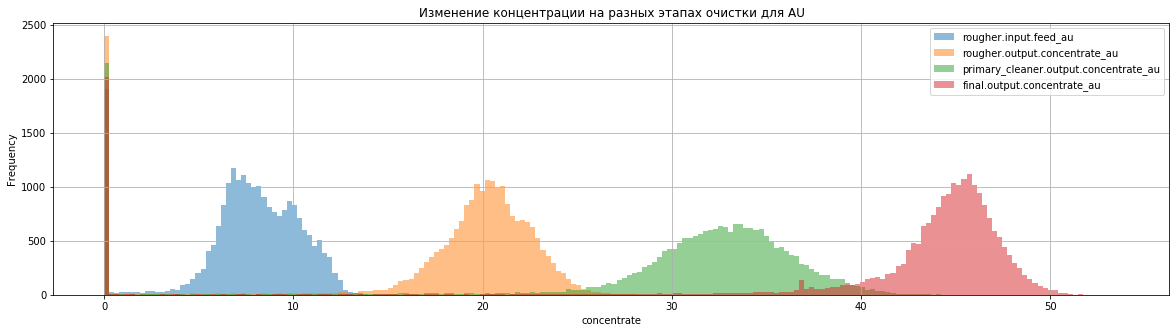

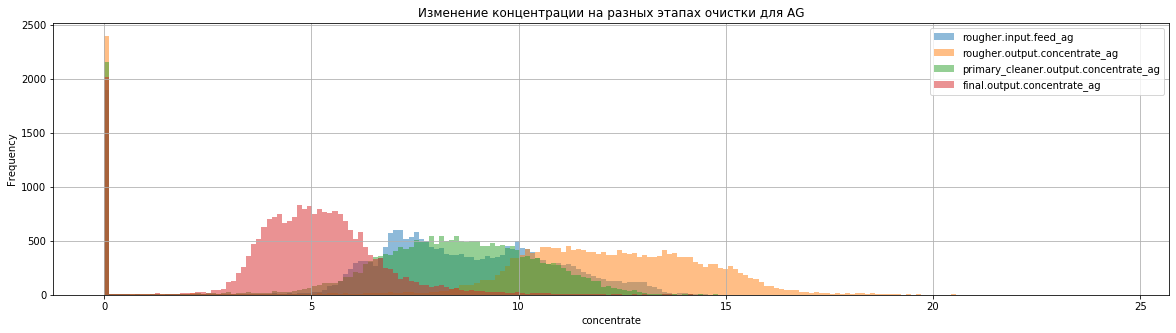

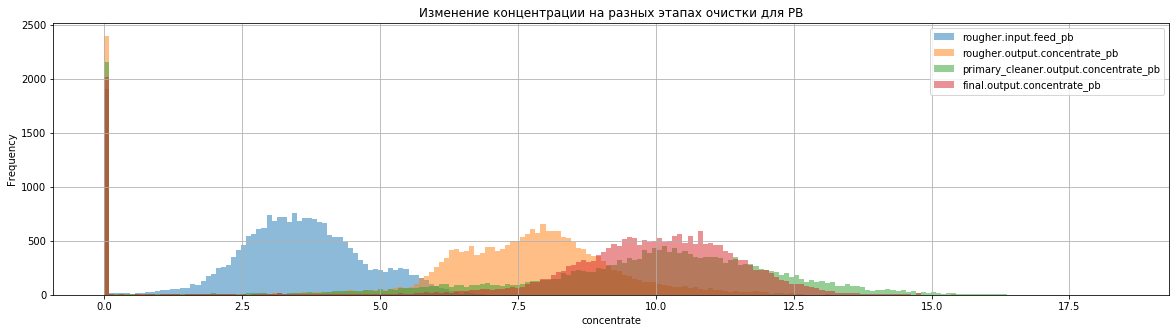

In [18]:
for metal in METALS:
    metrics = ['{}_{}'.format(x, metal) for x in CONCENTRATE_METRICS]

    gold_recovery_full[metrics].plot(
        title = 'Изменение концентрации на разных этапах очистки для {}'.format(metal.upper()),
        kind='hist', 
        bins=200, 
        grid=True, 
        legend=True,
        figsize=(20, 5),
        alpha=0.5,
    ).set(xlabel='concentrate') 
    
    plt.show()

Поместим средние значения концентрации на каждом из этапов очистки в таблицу и отобразим ее значения в виде графика.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный и наглядный график 👍
    
Здорово, когда он подписан. Так быстрее понять о чем идёт речь на нём.
    
</div>

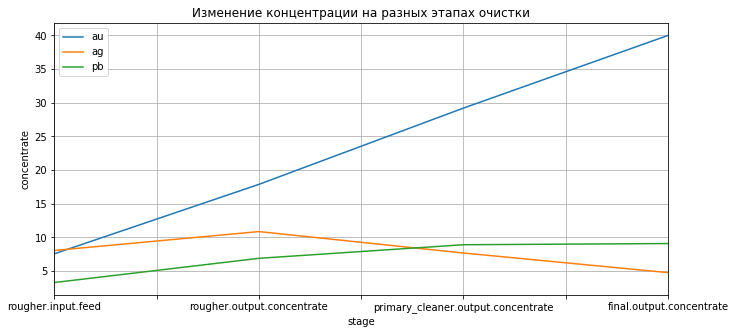

,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
au,7.56584,17.8795,29.2123,40.0012
ag,8.06572,10.8745,7.69165,4.78156
pb,3.30568,6.90065,8.92111,9.09531


In [19]:
metals_concentrate = pd.DataFrame(columns=CONCENTRATE_METRICS)

for metal in METALS:
    metal = metal.lower()
        
    for metric in CONCENTRATE_METRICS:
        metals_concentrate.loc[metal, metric] = gold_recovery_full['{}_{}'.format(metric, metal)].mean()

for metal in METALS:
    metals_concentrate.loc[metal].plot(
        title='Изменение концентрации на разных этапах очистки', 
        grid=True, 
        legend=True, 
        figsize=(11, 5)
    ).set(xlabel='stage', ylabel = 'concentrate')
plt.show()

display(metals_concentrate)

**Выводы**:
* Концентрация Au (золота) растет на протяжеии всех этапов и в конце становится в 5.3 раза больше, чем в начале
* Концентрация Ag (серебра) падает начиная с этапа флотации, в 1.6 раз
* Концентрация Pb (свинца) медленно растет на протяжении всех этапов очистки, в 2.7 раза

<a name="analyse_data.compare_training_and_test"></a>
### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Построим гистограмму по размеру гранул сырья на обучающей и тестовой выборках

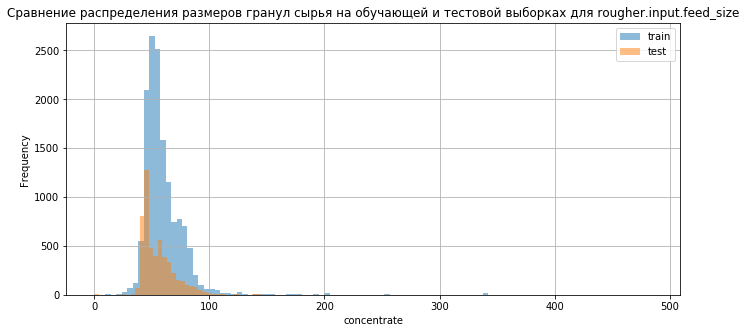

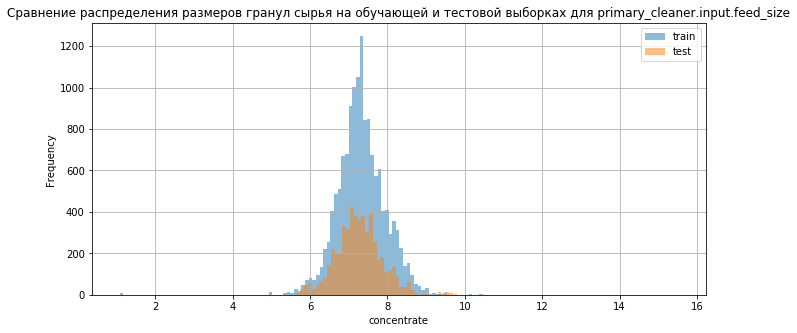

In [20]:
for metric in ('rougher.input.feed_size', 'primary_cleaner.input.feed_size'):
    for label, df in (('train', gold_recovery_train), ('test', gold_recovery_test)): 
        df[metric].plot(
                title = 'Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках для {}'.format(metric),
                kind='hist', 
                bins=100, 
                grid=True, 
                legend=True,
                figsize=(11, 5),
                alpha=0.5,
                label=label,
            ).set(xlabel='concentrate')
  
    plt.show()

**Вывод**: из графиков можно сделать вывод, что распределения размеров гранул сырья на обучающей и тестовой выборках совпадают а значит оценка модели будет правильной.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что некоторые графики у нас повторяются.
    
Это говорит о том, что мы можем создать функцию для постоянного их построения. И с помощью этого повысить оптимизацию своего кода и презентабельность проекта в целом.
    
</div>

<a name="analyse_data.analyse_sum_concentration"></a>
### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

Посчитаем сумму всех веществ (металлы + sol) по каждой из стадий и запишем их в датасет `gold_recovery_train` для дальнейшего поиска аномалий. Я не вижу смысла удалять аномалии из тестовой выборки, поскольку они не могут испортить качество модели, в худшем случае модель вернет для них неверные предсказания.

In [21]:
for metric in CONCENTRATE_METRICS:
    gold_recovery_train[metric] = 0
    for metal in METALS + ['sol']:
        gold_recovery_train[metric] += gold_recovery_train['{}_{}'.format(metric, metal)]
    
gold_recovery_train[CONCENTRATE_METRICS].head(5)

,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
date,,,,
2016-01-15 00:00:00,51.680034,66.424950,72.640924,63.644396
2016-01-15 01:00:00,50.659114,67.012710,72.543485,63.957723
2016-01-15 02:00:00,50.609929,66.103793,72.095042,64.311180
2016-01-15 03:00:00,51.061546,65.752751,59.957723,63.573449
2016-01-15 04:00:00,47.859163,65.908382,71.321010,64.004667


Определим класс, который посчитает границы нормальных значений (т.е Q1 - 1.5 * IQR и Q3 + 1.5 * IQR) и затем сможет нарисовать  графики по ним. 

In [22]:
NormalRange = namedtuple('NormalRange', ('min', 'max'))

class NormalRangeAnalyzer(object):
    MIN_VIEW_BOXPLOT_MUL = 0.8
    MAX_VIEW_BOXPLOT_MUL = 1.2
    
    def __init__(self, df, column_name):
        self._series = df[column_name]
        self._column_name = column_name
        self._normal_range = self._compute_normal_range()
    
    def _compute_normal_range(self):
        min_, q1, q3, max_ = self._series.quantile([0, 0.25, 0.75, 1])
        iqr = q3 - q1
        return NormalRange(max(min_, q1 - 1.5 * iqr), min(max_, q3 + 1.5 * iqr))
    
    @property
    def column_name(self):
        return self._column_name
    
    @property
    def normal_range(self):
        return self._normal_range
    
    def describe(self):       
        print('Границы нормальных значений для столбца {}: ({:.2f}, {:.2f})'.format(
            self._column_name, 
            self._normal_range.min,
            self._normal_range.max,
        ))
        display(self._series.describe())
        
    def plot(self, bins=100):
        range_min = self._normal_range.min * self.MIN_VIEW_BOXPLOT_MUL
        range_max = self._normal_range.max * self.MAX_VIEW_BOXPLOT_MUL
        
        fig, axes = plt.subplots(nrows=1, ncols=2)
        
        self._series.plot(
            kind='box',
            ax=axes[0],
            grid=True,
            ylim=(range_min, range_max),
            figsize=(20,5),
        )
        
        self._series.plot(
            kind='hist', 
            ax=axes[1],
            bins=bins, 
            title=self._column_name,
            grid=True,
            figsize=(20,5),
        )
        plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Интересный способ обработать наши данные с помощью классов 👍
    
</div>

Выведем гистограммы и диаграммы размаха для всех признаков

Границы нормальных значений для столбца rougher.input.feed: (40.29, 73.05)


count    14149.000000
mean        56.242170
std          7.029808
min          0.040000
25%         52.573579
50%         56.627635
75%         60.763234
max         74.458253
Name: rougher.input.feed, dtype: float64

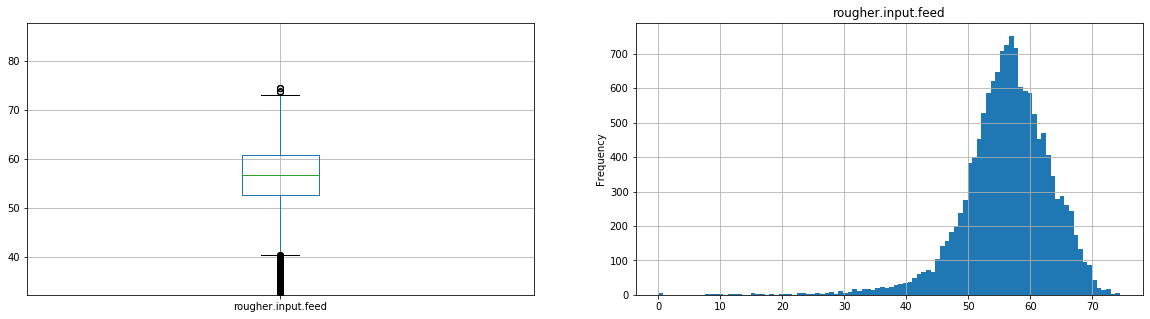

Границы нормальных значений для столбца rougher.output.concentrate: (52.14, 86.20)


count    14149.000000
mean        67.173145
std         12.713129
min          0.000000
25%         64.914390
50%         69.175663
75%         73.429261
max         88.140119
Name: rougher.output.concentrate, dtype: float64

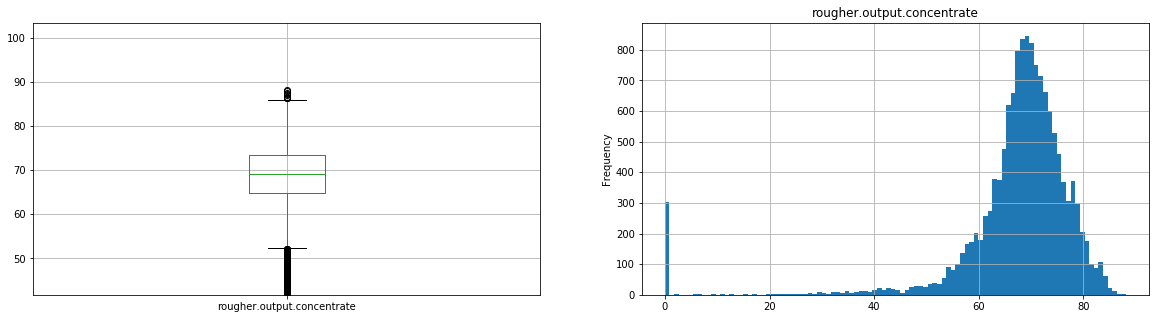

Границы нормальных значений для столбца primary_cleaner.output.concentrate: (47.08, 76.32)


count    14149.000000
mean        60.172546
std         10.448165
min          0.000000
25%         58.046816
50%         61.786946
75%         65.355951
max         76.918076
Name: primary_cleaner.output.concentrate, dtype: float64

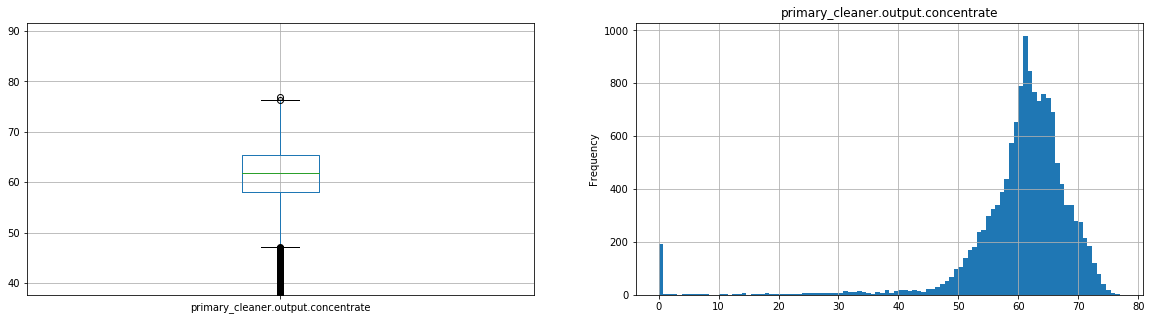

Границы нормальных значений для столбца final.output.concentrate: (62.44, 76.10)


count    14149.000000
mean        68.387872
std          7.023723
min          0.000000
25%         67.559819
50%         69.141502
75%         70.974661
max         80.210644
Name: final.output.concentrate, dtype: float64

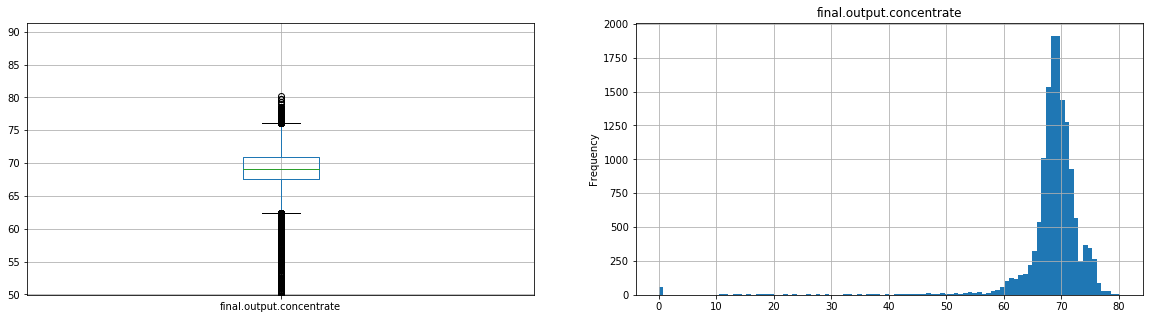

In [23]:
range_analyzers = []

for metric in CONCENTRATE_METRICS:
    range_analyzer = NormalRangeAnalyzer(gold_recovery_train, metric)
    range_analyzer.describe() 
    range_analyzer.plot() 
    range_analyzers.append(range_analyzer)

Избавимся от аномальных данных в обучающей выборке

In [24]:
print(gold_recovery_train.shape)

for range_analyzer in range_analyzers:    
    gold_recovery_train = gold_recovery_train[
        (gold_recovery_train[range_analyzer.column_name] >= range_analyzer.normal_range.min) & 
        (gold_recovery_train[range_analyzer.column_name] <= range_analyzer.normal_range.max)
    ]
    
print(gold_recovery_train.shape)

(14149, 90)
(11931, 90)


**Вывод**: Нашли и удалили 15.6% аномалий из обучающей выборки

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Что ж, достаточно серьезный объем, однако выбросы нам ни к чему 👍    
</div>

<a name="model_creation"></a>
## Построение модели

Удалим лишние признаки из train, т.е те, которых нет в test

In [25]:
missing_test_fields = fields_diff(gold_recovery_train, gold_recovery_test)
print(missing_test_fields)
gold_recovery_train = gold_recovery_train.drop(missing_test_fields, axis='columns')
print(fields_diff(gold_recovery_train, gold_recovery_test))
print(fields_diff(gold_recovery_test, gold_recovery_train))

{'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.tail_sol', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.tail_ag', 'rougher.output.concentrate', 'final.output.concentrate_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.concentrate', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_au', 'rougher.output.tail_au', 'rougher.output.tail_sol', 'final.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.input.feed', 'rougher.output.concentrate_ag', 'primary_cleaner.output.tail_sol', 'final.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate', 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'primary_cleane

Отлично, теперь в обучающей и тестовой выборке одни и те же признаки

<a name="model_creation.create_function"></a>
### Функция для вычисления итоговой sMAPE

Напишем функцию для вычисления итоговой sMAPE

In [26]:
def calculate_smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 
    
    
def calculate_final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * calculate_smape(target_actual_rougher, target_predictions_rougher)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

👍
    
</div>

Создадим scorer для того, чтобы испольщовать его при кросс-валидации

In [27]:
smape_scorer = make_scorer(calculate_final_smape, greater_is_better=False)

<a name="model_creation.train_models"></a>
### Обучение моделей и оценка их качества кросс-валидацией

Выделим фичи и целевые показатели `rougher.output.recovery` и `final.output.recovery`

In [28]:
features_train = gold_recovery_train.drop(TARGETS, axis='columns')
target_train = gold_recovery_train[TARGETS]
features_test = gold_recovery_test.drop(TARGETS, axis='columns')
target_test = gold_recovery_test[TARGETS]

Теперь обучим модели и посмотрим, какая даст лучшее значение sMAPE

**Дерево решений**

In [29]:
param_grid = {'max_depth': range(2, 11)}

model = DecisionTreeRegressor(random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для дерева решений: 6.886624936629446 при значениях гиперпараметров: {'max_depth': 2}


**Cлучайный лес**

In [30]:
param_grid = {'n_estimators': range(10, 31, 10)}

model = RandomForestRegressor(max_depth=2, random_state=RANDOM_STATE)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Лучшее значение sMAPE для случайного леса: 6.626027088525869 при значениях гиперпараметров: {'n_estimators': 20}


**Линейная регрессия**

In [31]:
model = LinearRegression()
model.fit(features_train, target_train)
smape = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer).mean()
print('Лучшее значение sMAPE для линейной регрессии:', -smape)

Лучшее значение sMAPE для линейной регрессии: 7.1380816650089995


Выяснили, что лучшая модель - **Cлучайный лес**. Проверим ее качество на тестовой выборке.  

In [32]:
model = RandomForestRegressor(max_depth=2, n_estimators=20, random_state=RANDOM_STATE) 
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print('sMAPE для тестовых данных:', calculate_final_smape(target_test, predictions_test))

sMAPE для тестовых данных: 7.804756882032331


**Выводы**:
* случайный лес дал лучшее значение sMAPE среди других моделей 
* на тестовой выборке случайный лес предсказал значения целевых признаков `rougher.output.recovery` и `final.output.recovery` с sMAPE 7.8

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
И с этим трудно поспорить 👍
    
Проект сделан настолько хорошо, что даже добавить нечего, только достаточно мелкие значение, которые я оставил на пути к финалу.

На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
        
Успехов тебе в новых проектах! 
    
</div>

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке